# Задачи
### 1. Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

### 2.Нарисуйте график распределения показов на объявление за весь период.

### 3.Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

### 4.Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 

### 5.*Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день, в который была замечена самая большая по модулю аномалия. 

### 6.Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

### 7.Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))

### 8.Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

### 9.А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # позволяет строить интерактивные графики

%matplotlib inline

In [2]:
ads_data = pd.read_csv('~/shared/homeworks/python_ds_miniprojects/6/ads_data.csv', parse_dates=['date', 'time'])

In [3]:
ads_clients_data = pd.read_csv('~/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv', parse_dates=['date', 'create_date'])

In [40]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [5]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


### 1. Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).


In [6]:
# Сгруппируем данные по id объявления и типу реакции (показ или клик). Далее посчитаем количество для кликов и показов

ads_data.groupby(['ad_id', 'event'], as_index=False).agg({'platform': 'count'})

,ad_id,event,platform
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [7]:
# Преобразуем полученные значения так, чтобы click и view стали колонками, а их количества - значениями этих колонок
general_click_view_values = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'platform': 'count'}) \
    .pivot(index='ad_id', columns='event', values='platform') \
    .reset_index() \
    .fillna(0)

In [8]:
# Посчитаем среднее значение для click и для values
print(round(general_click_view_values.click.mean(), 0))
print(round(general_click_view_values.view.mean(), 0))

113.0
923.0


### 2.Нарисуйте график распределения показов на объявление за весь период.


In [9]:
general_click_view_values.head()

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0


In [10]:
# general_click_view_values = general_click_view_values.assign(views_fraction = general_click_view_values.view / sum(general_click_view_values.view))

dist_views = np.log(general_click_view_values[['view']]).query('view != "-inf"')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


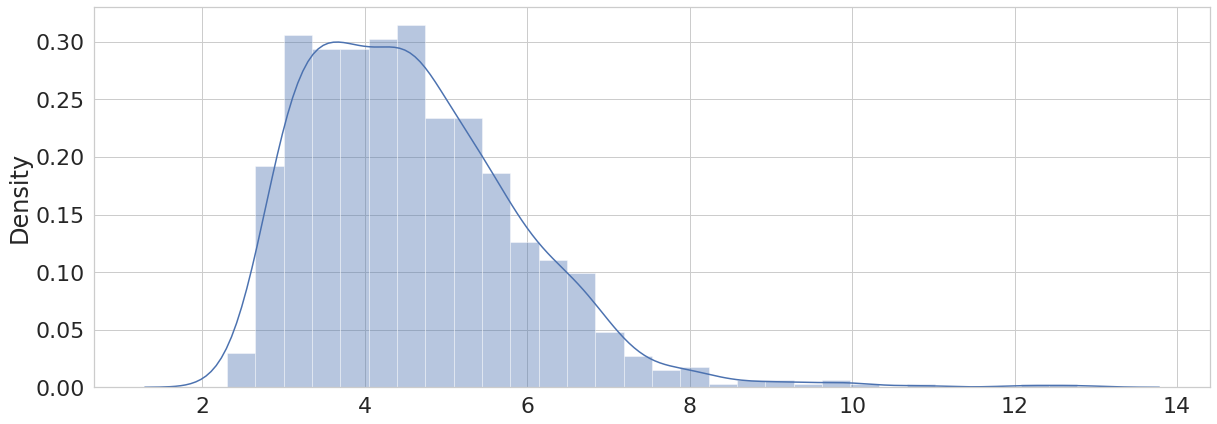

In [11]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

sns.distplot(dist_views)

### 3.Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?


In [32]:
date_views_rolling = ads_data.query('event == "view"').groupby(['date', 'ad_id'], as_index=[False, False]) \
    .agg({'event': 'count'}) 
date_views_rolling = date_views_rolling.groupby('date') \
    .agg({'event': 'mean'}) \
    .rolling(2).mean() \
    .fillna(0) \
    .round(0) 

date_views_rolling = date_views_rolling.reset_index().rename(columns={'event': 'rolling'})

date_views_rolling

# date_views.event = date_views.event.rolling(2).mean()
# date_views.query('date == "2019-04-06"')

,date,rolling
0,2019-04-01,0.0
1,2019-04-02,146.0
2,2019-04-03,151.0
3,2019-04-04,420.0
4,2019-04-05,798.0
5,2019-04-06,598.0


### 4.Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 


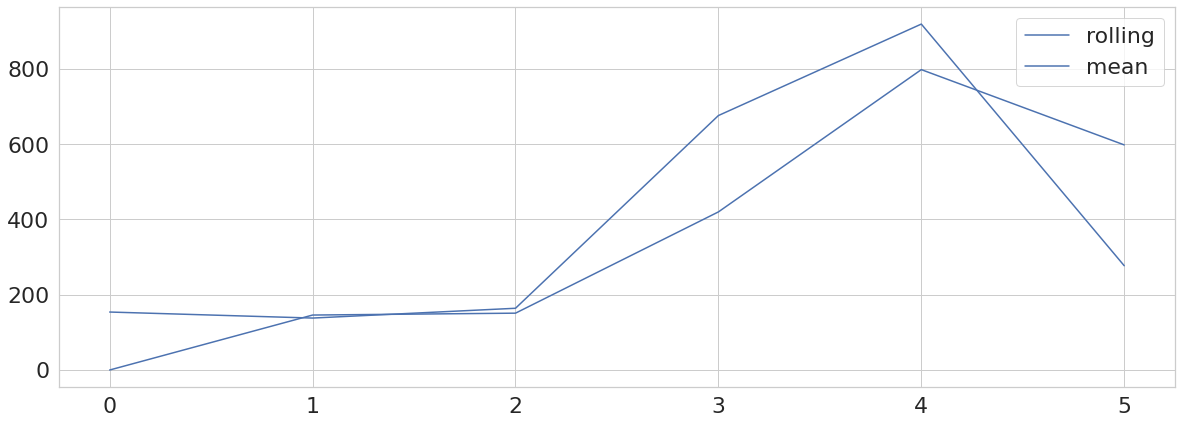

In [33]:
date_views = ads_data.query('event == "view"').groupby(['date', 'ad_id'], as_index=[False, False]) \
    .agg({'event': 'count'}) 
date_views = date_views.groupby('date') \
    .agg({'event': 'mean'}) \
    .round(0)

date_views = date_views.reset_index().rename(columns={'event': 'mean'})

ax_1 = sns.lineplot(data=date_views_rolling, color='green')
ax_2 = sns.lineplot(data=date_views)

,date,rolling,mean,abs_difference
0,2019-04-01,0.0,154.0,154.0
1,2019-04-02,146.0,138.0,8.0
2,2019-04-03,151.0,164.0,13.0
3,2019-04-04,420.0,676.0,256.0
4,2019-04-05,798.0,919.0,121.0
5,2019-04-06,598.0,277.0,321.0


### 5.Найдите проблемное объявление, в который была замечена самая большая по модулю аномалия. 


In [38]:
task_4 = date_views_rolling.merge(right=date_views, on='date')
task_4 = task_4.assign(abs_difference = abs(task_4['rolling'] - task_4['mean']))
task_4

,date,rolling,mean,abs_difference
0,2019-04-01,0.0,154.0,154.0
1,2019-04-02,146.0,138.0,8.0
2,2019-04-03,151.0,164.0,13.0
3,2019-04-04,420.0,676.0,256.0
4,2019-04-05,798.0,919.0,121.0
5,2019-04-06,598.0,277.0,321.0


### 6.Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.


In [126]:
full_data = ads_data.merge(right=ads_clients_data, on='client_union_id', how='inner')
full_data = full_data.assign(day_difference = full_data.date_x - full_data.create_date )


In [127]:
full_data_day = full_data.groupby('client_union_id').agg({'day_difference': 'min'}) \
    .reset_index()
full_data_day

,client_union_id,day_difference
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


### 7.Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))


In [128]:
compare = pd.Timedelta(365, unit="day")
full_data_day = full_data_day.query('day_difference <= @compare')
conversion = (full_data_day.day_difference.count() / ads_clients_data['create_date'].count()) * 100
conversion.round(2)


0.69

### 8.Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]


In [130]:
full_data_day.day_difference = pd.cut(full_data_day.day_difference, pd.to_timedelta(['0d', '30d', '90d', '180d', '365d']), labels=['30', '90', '180', '365'])


In [131]:
full_data_day.value_counts('day_difference')

day_difference
180    396
90     263
365    168
30      11
dtype: int64

### 9.А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [132]:
full_data_day

,client_union_id,day_difference
0,1,180
1,9,180
2,13,90
3,16,180
4,20,90
...,...,...
833,122004,90
834,122013,180
835,122023,180
836,122031,180


In [133]:
full_data_day = full_data_day.groupby('day_difference', as_index=False).agg({'client_union_id': 'count'})
full_data_day


,day_difference,client_union_id
0,30,11
1,90,263
2,180,396
3,365,168


In [134]:
px.bar(x=full_data_day.day_difference, y=full_data_day.client_union_id)